# Data ranges

This section provides examples of how to set data ranges for a plot via keyword arguments.  Options include:
<ul>
<li>explicitly setting limits for `x`, `y`, and/or `z` axis</li>
<li>automatically calculating limits based on a percentage of the total data range</li>
<li>sharing limits by axis, row, or column</li>
</ul>

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace

### Read sample data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data.csv'))
df_box = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_box.csv'))
df_contour = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_contour.csv'))

### Set theme

In [3]:
#fcp.set_theme('white')
#fcp.set_theme('gray')

### Other

In [4]:
SHOW = False

## Explicit limits

### Simple case

Consider the following plot:

I [A] vs Voltage.png


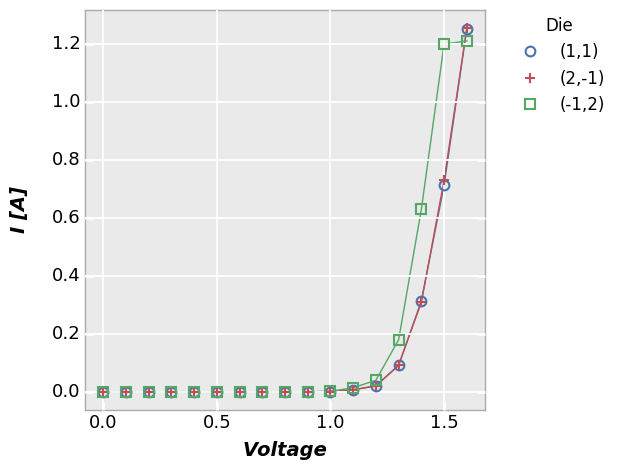

In [5]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', inline=True, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

Now we can zoom in on a specific x-axis range (note that the y-axis range auto-scales accordingly):

I [A] vs Voltage.png


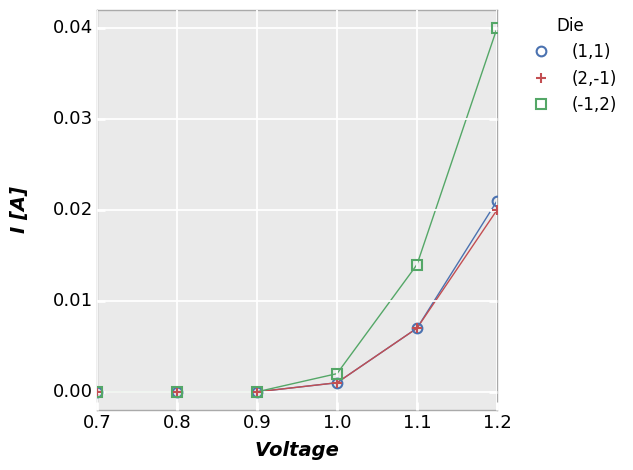

In [6]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', inline=True, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         xmin=0.7, xmax=1.2)

We can zoom even further on the y-axis range by explicitly defining that range:

I [A] vs Voltage.png


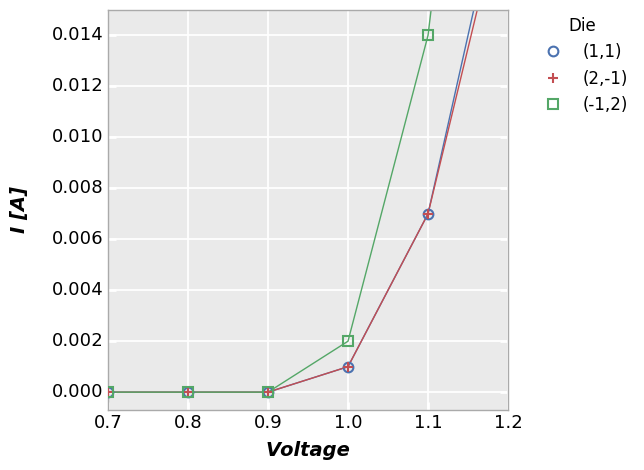

In [52]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', inline=True, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         xmin=0.7, xmax=1.2, ymax=0.015)

We can disable auto-scaling of the non-explictly specified limits by setting the keyword `auto_scale` to `False`:

I [A] vs Voltage.png


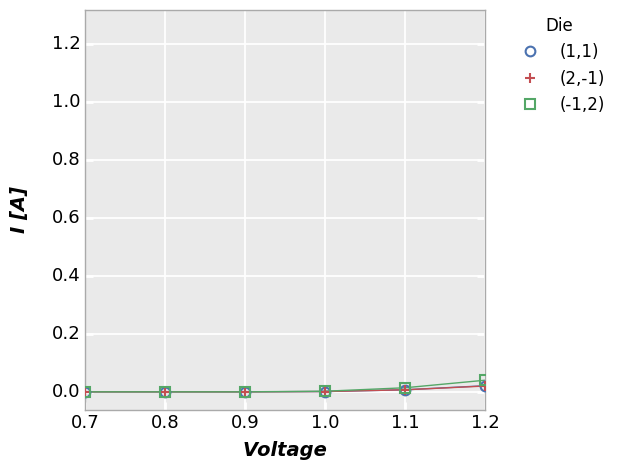

In [60]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', inline=True, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         xmin=0.7, xmax=1.2, auto_scale=False)

### Secondary y-axis

Now condsider the case of a secondary y-axis:

Voltage + I [A] vs Voltage.png


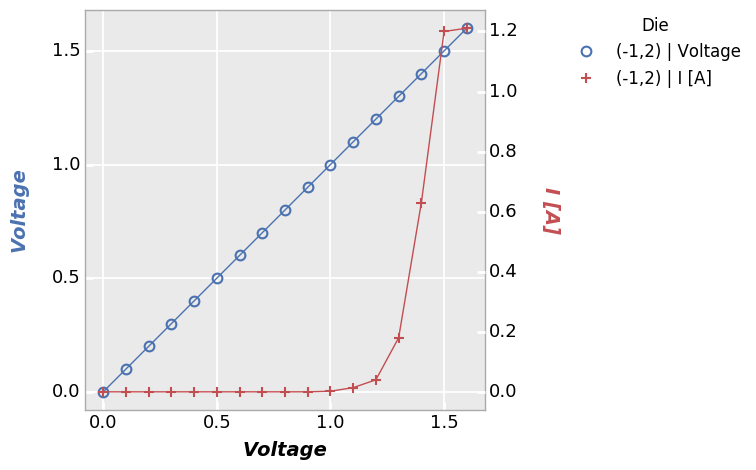

In [59]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], inline=True, twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

Now add limits to the primary y-axis:

Voltage + I [A] vs Voltage.png


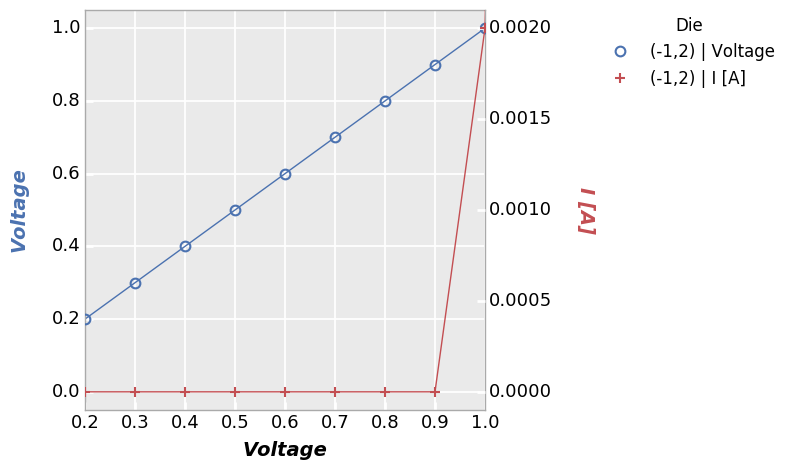

In [61]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], inline=True, twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         xmin=0.2, xmax=1)

Or with auto-scaling disabled:

Voltage + I [A] vs Voltage.png


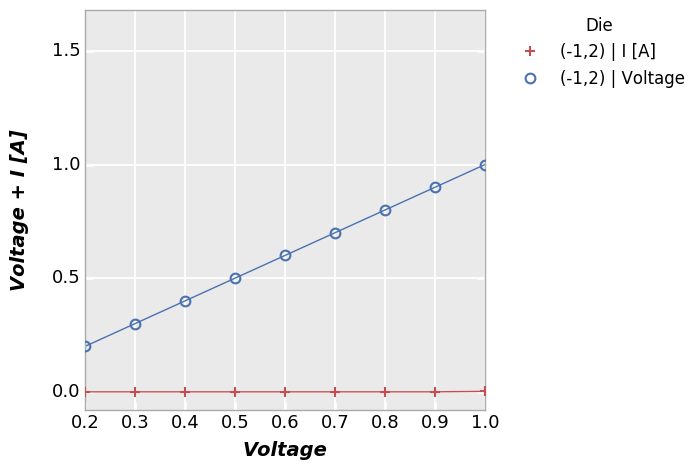

In [62]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], inline=True, twin_x=False, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         xmin=0.2, xmax=1, auto_scale=False, grid_major_on=False)
# what is wrong with the axis border??

Now specify a minimum limit for the primary y-axis.  The x-axis range will adjust to matchBecause the x-axis is shared or "twinned" 

Voltage + I [A] vs Voltage.png


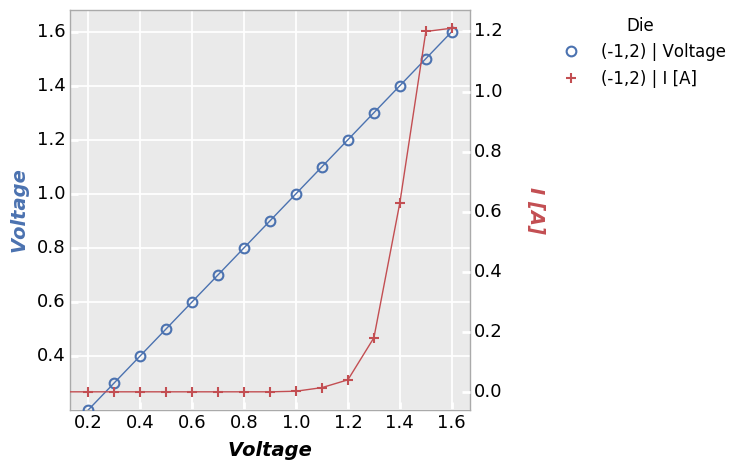

In [63]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], inline=True, twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ymin=0.2)

Or now with the secondary y-axis:

> c:\github\fivecentplots\fivecentplots\layout.py(409)__init__()
-> self.hist = Element('hist', self.fcpp, kwargs,
(Pdb) self.twin_x
*** AttributeError: 'LayoutMPL' object has no attribute 'twin_x'
(Pdb) self.axes.twin_x
True
(Pdb) self.tick_labels_major.font_color=self.label.font_color.get(0)
*** AttributeError: 'LayoutMPL' object has no attribute 'label'
(Pdb) self.tick_labels_major_y.font_color = color_list[0]
(Pdb) c
Voltage + I [A] vs Voltage.png


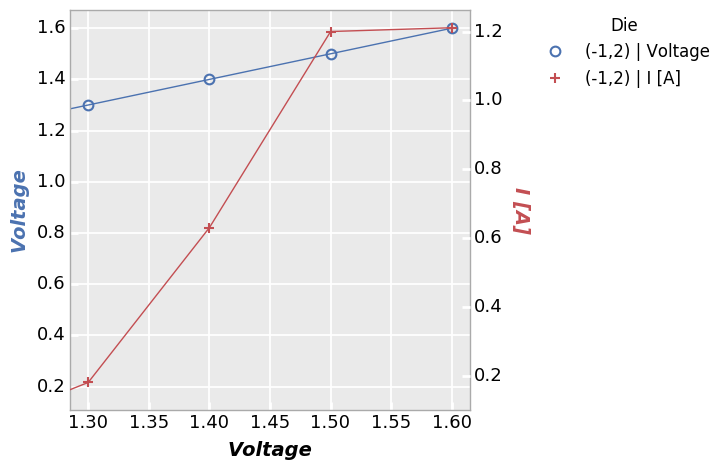

In [65]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], inline=True, twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         y2min=0.1)

In [14]:
# NEED TO CHECK NON-TWINNED CASE
# Make ticks for twin have same color as labels (and do tick labels?)

## Axes sharing

### Shared axes (default)

By default, grid plots share axes and tick labels and x and y data ranges.

I [A] vs Voltage by Temperature [C] by Boost Level.png


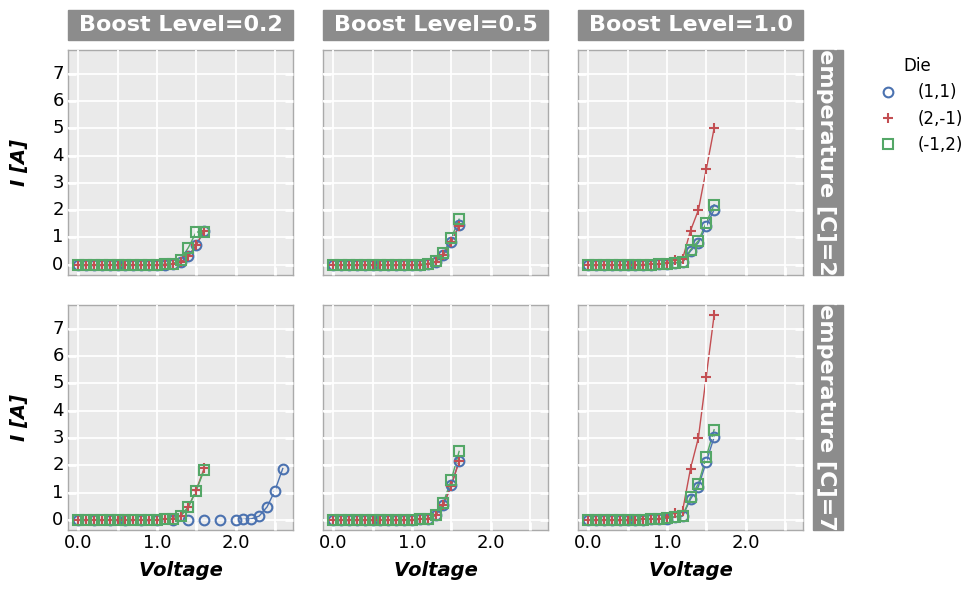

In [15]:
# UPDATE
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
         inline=True, show=False, ax_size=[225, 225])

Without share_x or share_y

### Share rows

### Share columns